# IDEA
### More people use citibikes in rush hours( 7-9 am and 4-6 pm ) everyday.

## NULL HYPOTHESIS:
The Mean of citibike trips start in the rush hours( 7-9 am and 4-6 pm ) is the same or smaller than the mean of the rest of citibike trips.

$$ H_0: M_{rush} <= \overline{M_{rush}} $$

$$ H_1: M_{rush} > \overline{M_{rush}} $$

### Download and move data to PUIDATA
### Reading data from citibike csv file from Jan 2015

In [2]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

Populating the interactive namespace from numpy and matplotlib


In [3]:
print (os.getenv ('PUIDATA'))

/home/cusp/ch3019/PUIdata


In [4]:
### A function to download the data: simple bash commands can be run by preceding them with !
### but more complex command lines with variable arguments need to be build as strng and run with os.system


def getCitiBikeCSV(datestring):
    ### mkdir if dir doed not exist
    if not os.path.exists(os.getenv("PUIDATA")):
        os.system("mkdir" + os.getenv("PUIDATA"))
    
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))    
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring or '2013' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            ### move csv
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [5]:
datestring = '201501'
getCitiBikeCSV(datestring)

file in place, you can continue


### Display the top few rows of the DF in your notebook

In [6]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv').dropna()
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


### Display the reducted dataframe

In [7]:
data = df.loc[:,["starttime"]]
data["date"] = pd.to_datetime(data["starttime"])

In [8]:
n = len(data)
data["hour"] = data["date"].dt.hour

In [9]:
data.head()

,starttime,date,hour
0,1/1/2015 0:01,2015-01-01 00:01:00,0
1,1/1/2015 0:02,2015-01-01 00:02:00,0
2,1/1/2015 0:04,2015-01-01 00:04:00,0
3,1/1/2015 0:04,2015-01-01 00:04:00,0
4,1/1/2015 0:05,2015-01-01 00:05:00,0


### Plot the data distributions

In [10]:
group_h = data["date"]\
            [(data["hour"] - 7) * (data["hour"] - 8) * (data["hour"] - 16) * (data["hour"] - 17) == 0]\
            .groupby(data["date"].dt.day)

group_r = data["date"]\
            [(data["hour"] - 7) * (data["hour"] - 8) * (data["hour"] - 16) * (data["hour"] - 17) != 0]\
            .groupby(data["date"].dt.day)

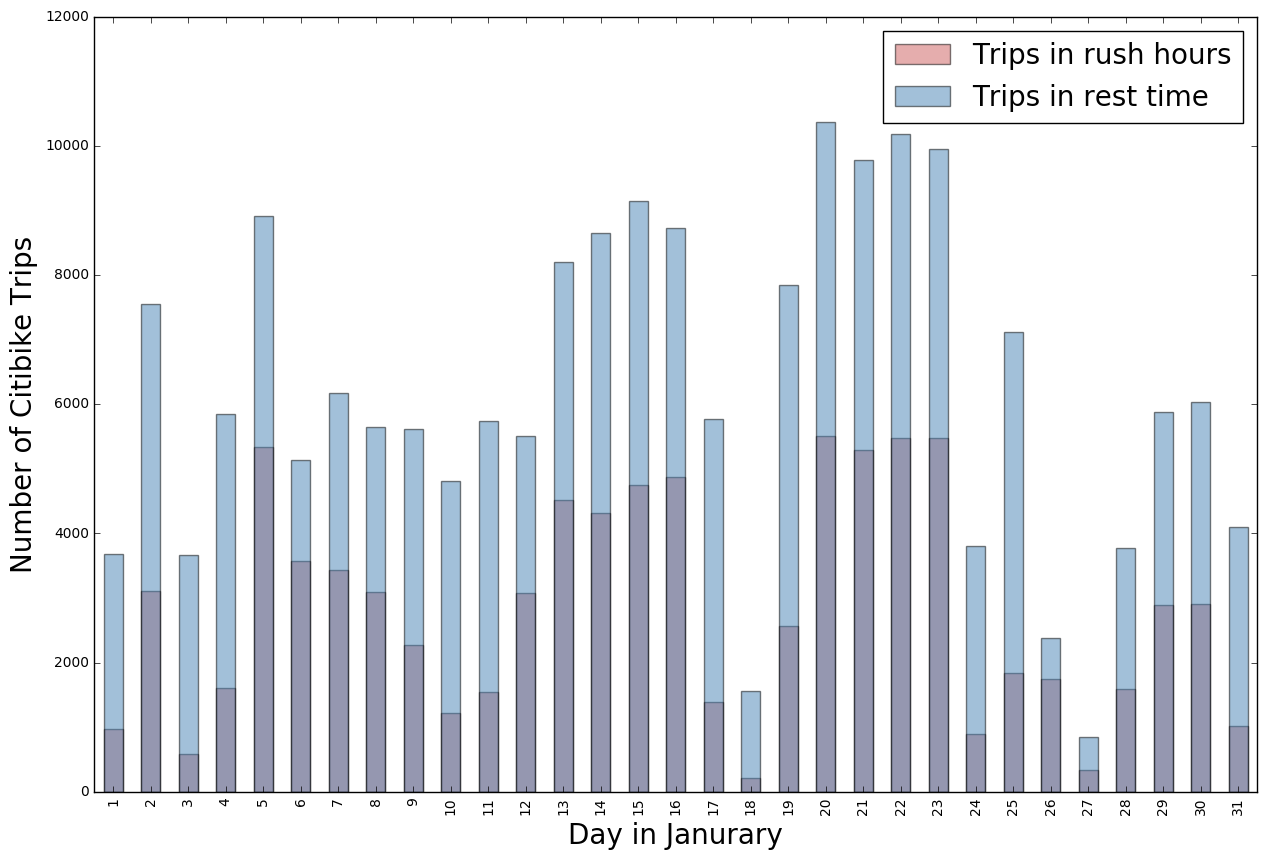

In [12]:
fig = pl.figure(figsize(15,10))

group_h.count().plot.bar(color = 'IndianRed', alpha=0.5, label = "Trips in rush hours")

group_r.count().plot.bar(color = 'SteelBlue', alpha=0.5, label = "Trips in rest time")

pl.xlabel("Day in Janurary", fontsize=20)
pl.ylabel("Number of Citibike Trips", fontsize=20)
pl.legend(['Trips in rush hours','Trips in rest time'],fontsize=20)